In [2]:
import numpy as np
import matplotlib.pyplot as plt


In [162]:
def genfromtxt(filename, delimiter=',', skip_header=0):
    with open(filename) as f:
        lines = f.readlines()
    data = []
    for line in lines[skip_header:]:
        data.append([float(x) for x in line.strip().split(delimiter)])
    return np.array(data)

data = genfromtxt('../data/Module_4/advertising.csv', delimiter=',', skip_header=1)
N = data.shape[0]
X = data[:,:3]
y = data[:,3:]

def mean_normalization(X):
    N = len(X)
    maxi = np.max(X)
    mini = np.min(X)
    avg = np.mean(X)
    X = (X - avg) / (maxi - mini)
    X_b = np.c_[np.ones((N, 1)), X]
    return X_b, maxi, mini, avg 

X_b, maxi, mini, avg = mean_normalization(X)



In [167]:
print(data)
print(X)
print(y)
print(X_b)
print(maxi)
print(mini)
print(avg)

[[230.1  37.8  69.2  22.1]
 [ 44.5  39.3  45.1  10.4]
 [ 17.2  45.9  69.3  12. ]
 [151.5  41.3  58.5  16.5]
 [180.8  10.8  58.4  17.9]
 [  8.7  48.9  75.    7.2]
 [ 57.5  32.8  23.5  11.8]
 [120.2  19.6  11.6  13.2]
 [  8.6   2.1   1.    4.8]
 [199.8   2.6  21.2  15.6]
 [ 66.1   5.8  24.2  12.6]
 [214.7  24.    4.   17.4]
 [ 23.8  35.1  65.9   9.2]
 [ 97.5   7.6   7.2  13.7]
 [204.1  32.9  46.   19. ]
 [195.4  47.7  52.9  22.4]
 [ 67.8  36.6 114.   12.5]
 [281.4  39.6  55.8  24.4]
 [ 69.2  20.5  18.3  11.3]
 [147.3  23.9  19.1  14.6]
 [218.4  27.7  53.4  18. ]
 [237.4   5.1  23.5  17.5]
 [ 13.2  15.9  49.6   5.6]
 [228.3  16.9  26.2  20.5]
 [ 62.3  12.6  18.3   9.7]
 [262.9   3.5  19.5  17. ]
 [142.9  29.3  12.6  15. ]
 [240.1  16.7  22.9  20.9]
 [248.8  27.1  22.9  18.9]
 [ 70.6  16.   40.8  10.5]
 [292.9  28.3  43.2  21.4]
 [112.9  17.4  38.6  11.9]
 [ 97.2   1.5  30.   13.2]
 [265.6  20.    0.3  17.4]
 [ 95.7   1.4   7.4  11.9]
 [290.7   4.1   8.5  17.8]
 [266.9  43.8   5.   25.4]
 

In [165]:
def stochastic_gradient_descent(X_b, y, n_epochs=50, learning_rate=0.0001):
    
    thetas = np.asarray([[1.16270837], [ -0.81960489] , [1.39501033],[0.29763545]])
    thetas_path = [thetas]
    losses = []

    for epoch in range(n_epochs):
        for i in range(N):
            random_index = i #should be = np.random.randint(N)
            xi = X_b[random_index:random_index+1]
            yi = y[random_index:random_index+1]

            #Compute output
            output = xi.dot(thetas)
            #Compute loss
            loss = output - yi
            total_loss = np.sum(loss**2) / 2
            #Compute gradient
            gradients = xi.T.dot(loss)
            #Update thetas
            thetas = thetas - learning_rate * gradients 

            thetas_path.append(thetas) 
            losses.append(total_loss)
    return thetas_path, losses


            


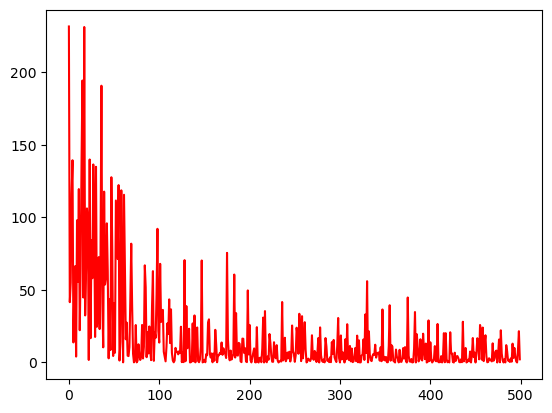

In [166]:
sgd_theta, losses = stochastic_gradient_descent(X_b, y, n_epochs=50, learning_rate=0.01)

x_axis = list(range(500))
plt.plot(x_axis, losses[:500], color="r")
plt.show()

In [168]:
#question 1
sgd_theta, losses = stochastic_gradient_descent(X_b, y, n_epochs=1, learning_rate=0.01)

print(np.sum(losses))
#B

6754.643359356192


In [169]:
def mini_batch_gradient_descent(X_b, y, n_epochs=50, minibatch_size = 20, learning_rate = 0.01):

    thetas = np . asarray ([[1.16270837] , [ -0.81960489] , [1.39501033] , [0.29763545]])
    thetas_path = [thetas]
    losses = []

    for epoch in range(n_epochs):
        
        #should be shuffled_indices = np.random.permutation(N)
        shuffled_indices = np . asarray ([21 , 144 , 17 , 107 , 37 , 115 , 167 , 31 , 3 ,
132 , 179 , 155 , 36 , 191 , 182 , 170 , 27 , 35 , 162 , 25 , 28 , 73 , 172 , 152 , 102 , 16 ,
185 , 11 , 1 , 34 , 177 , 29 , 96 , 22 , 76 , 196 , 6 , 128 , 114 , 117 , 111 , 43 , 57 , 126 ,
165 , 78 , 151 , 104 , 110 , 53 , 181 , 113 , 173 , 75 , 23 , 161 , 85 , 94 , 18 , 148 , 190 ,
169 , 149 , 79 , 138 , 20 , 108 , 137 , 93 , 192 , 198 , 153 , 4 , 45 , 164 , 26 , 8 , 131 ,
77 , 80 , 130 , 127 , 125 , 61 , 10 , 175 , 143 , 87 , 33 , 50 , 54 , 97 , 9 , 84 , 188 , 139 ,
195 , 72 , 64 , 194 , 44 , 109 , 112 , 60 , 86 , 90 , 140 , 171 , 59 , 199 , 105 , 41 , 147 ,
92 , 52 , 124 , 71 , 197 , 163 , 98 , 189 , 103 , 51 , 39 , 180 , 74 , 145 , 118 , 38 , 47 ,
174 , 100 , 184 , 183 , 160 , 69 , 91 , 82 , 42 , 89 , 81 , 186 , 136 , 63 , 157 , 46 , 67 ,
129 , 120 , 116 , 32 , 19 , 187 , 70 , 141 , 146 , 15 , 58 , 119 , 12 , 95 , 0 , 40 , 83 , 24 ,
168 , 150 , 178 , 49 , 159 , 7 , 193 , 48 , 30 , 14 , 121 , 5 , 142 , 65 , 176 , 101 , 55 ,
133 , 13 , 106 , 66 , 99 , 68 , 135 , 158 , 88 , 62 , 166 , 156 , 2 , 134 , 56 , 123 , 122 ,
154])
        X_b_shuffled = X_b[shuffled_indices]
        y_shuffled = y[shuffled_indices]

        for i in range(0, N, minibatch_size):
            xi = X_b_shuffled[i:i+minibatch_size]
            yi = y_shuffled[i:i+minibatch_size]

            #Compute output
            output = xi.dot(thetas)
            #Compute loss
            loss = np.sum((output - yi)**2) / (2)#* minibatch_size)
            #Compute gradient
            gradient = xi.T.dot(output - yi) / minibatch_size
            #Update thetas        
            thetas = thetas - learning_rate * gradient 
            thetas_path.append(thetas)

            loss_mean = np.sum(loss) / minibatch_size
            losses.append(loss_mean)
    return thetas_path, losses    


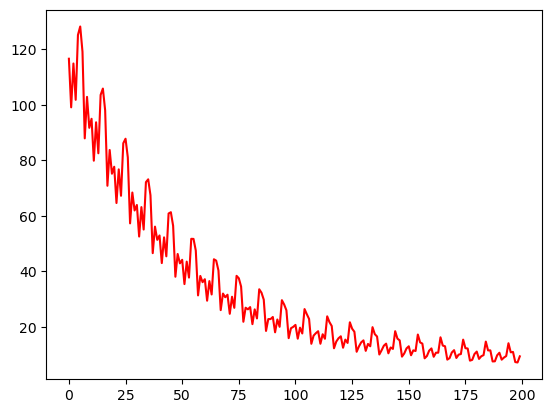

In [170]:
mbgd_thetas, losses = mini_batch_gradient_descent(X_b, y, n_epochs=50, minibatch_size=20, learning_rate=0.01)

x_axis = list(range(200))
plt.plot(x_axis, losses[:200], color="r")
plt.show()

In [171]:
#question 2
mbgd_thetas, losses = mini_batch_gradient_descent(X_b, y, n_epochs=50, minibatch_size=20, learning_rate=0.01)

print(round(np.sum(losses), 2))
#D

8865.65


In [229]:
def batch_gradient_descent(X_b, y, n_epochs=100, learning_rate=0.01):

    thetas = np . asarray ([[1.16270837] , [ -0.81960489] , [1.39501033] , [0.29763545]])
    thetas_path = [thetas]
    losses = []

    for epoch in range(n_epochs):
        #Compute output
        output = X_b.dot(thetas)
        #Compute loss
        loss = output - y
        total_loss = np.sum(loss**2) /2
        #Compute gradient
        gradient = X_b.T.dot(loss) / N
        
        #Update thetas
        thetas = thetas - learning_rate * gradient
        thetas_path.append(thetas)

        mean_loss = np.sum(total_loss)/N
        losses.append(mean_loss)
    return thetas_path, losses

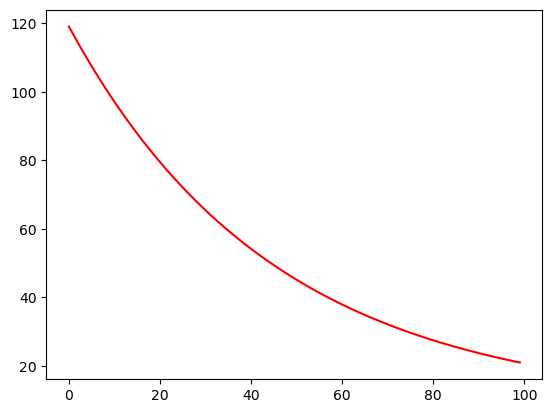

In [230]:


bgd_thetas, losses = batch_gradient_descent(X_b, y, n_epochs=100, learning_rate=0.01)

x_axis = list(range(100))
plt.plot(x_axis, losses[:100], color="r")
plt.show()

In [231]:
bgd_thetas , losses = batch_gradient_descent ( X_b , y , n_epochs =100 , learning_rate
=0.01)
print(round(sum(losses),2))

5353.15


In [71]:
import pandas as pd 

df = pd.read_csv('../data/Module_4/BTC-Daily.csv')

df = df.drop_duplicates()

2014-11-28 to 2022-03-01


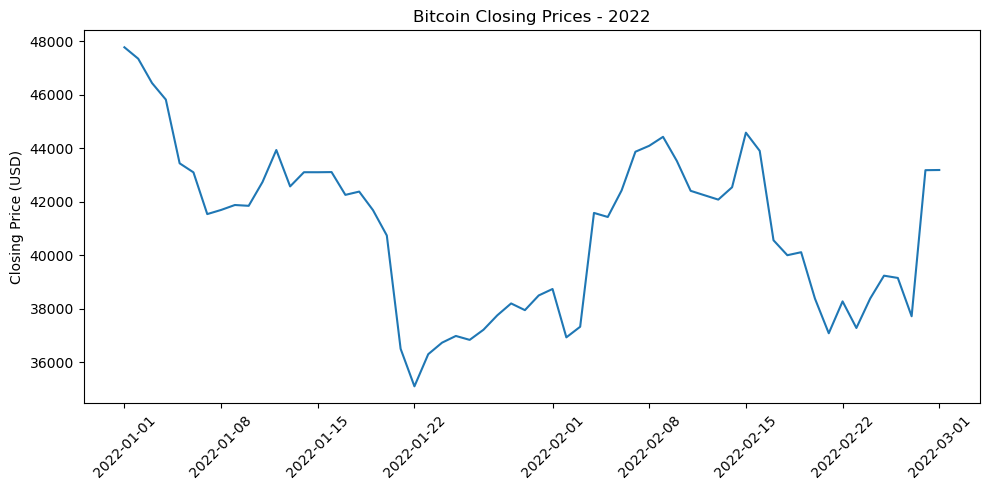

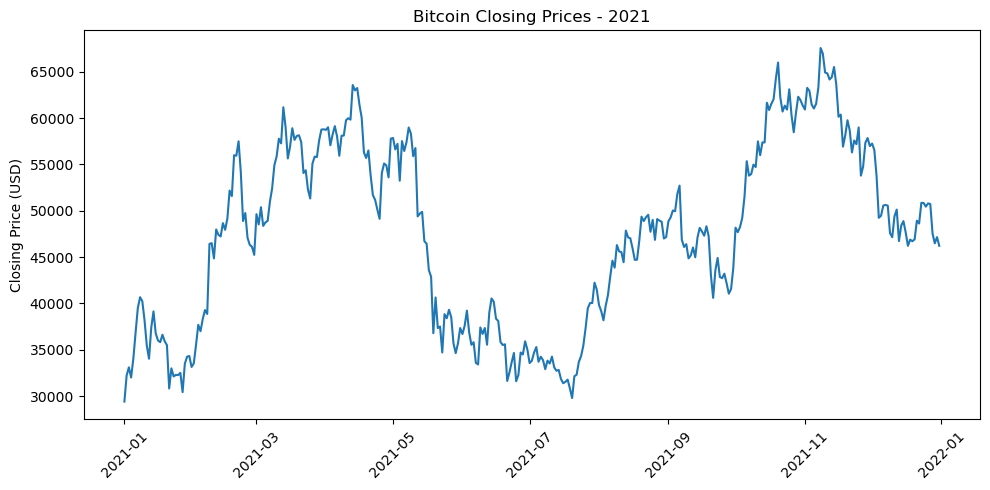

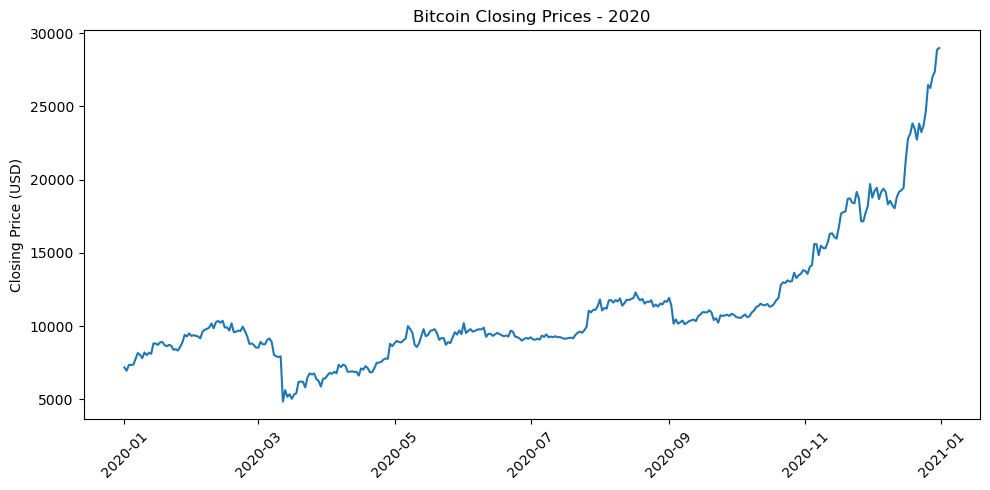

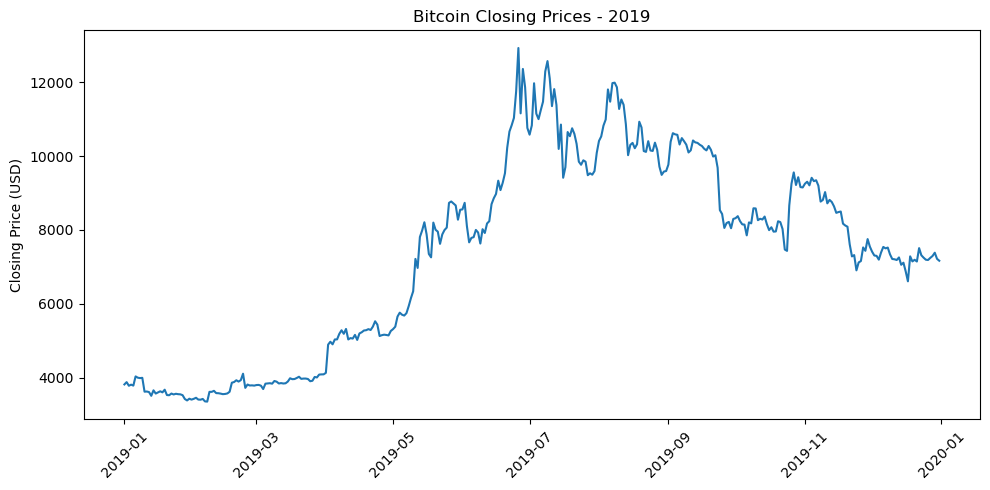

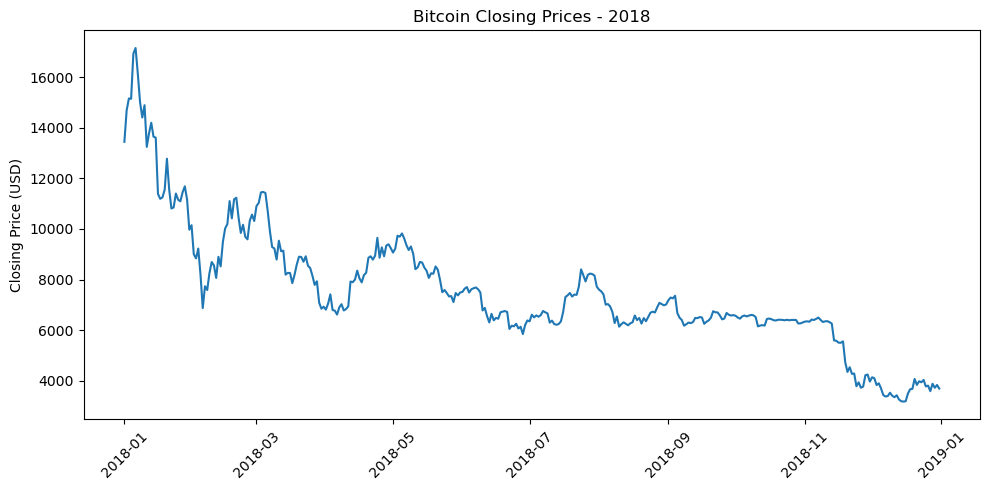

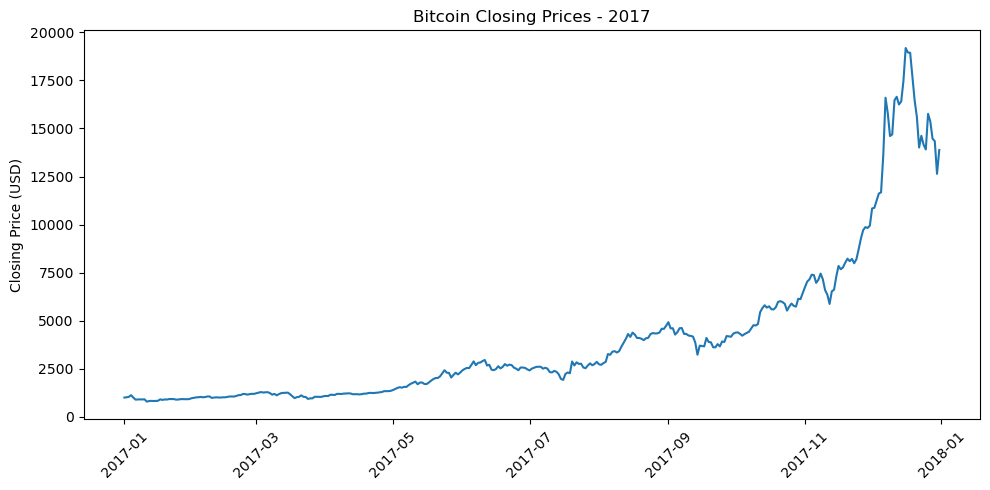

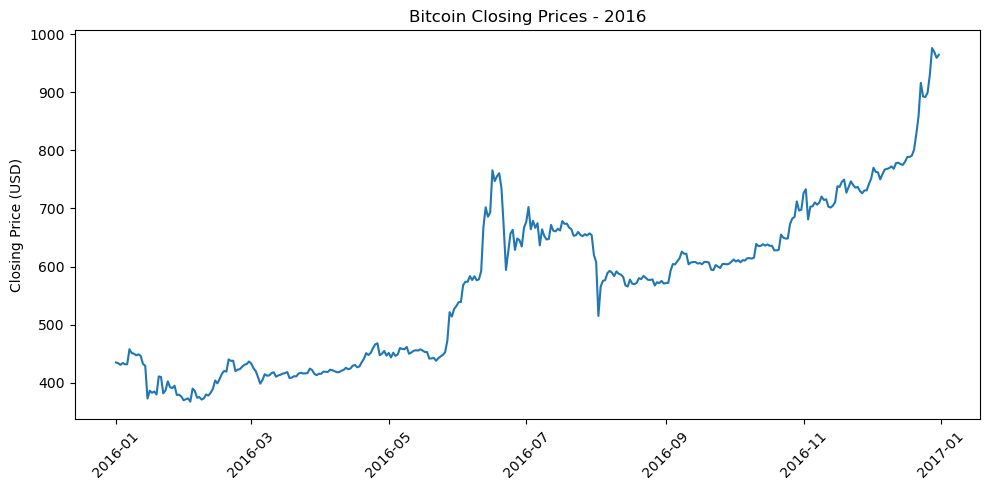

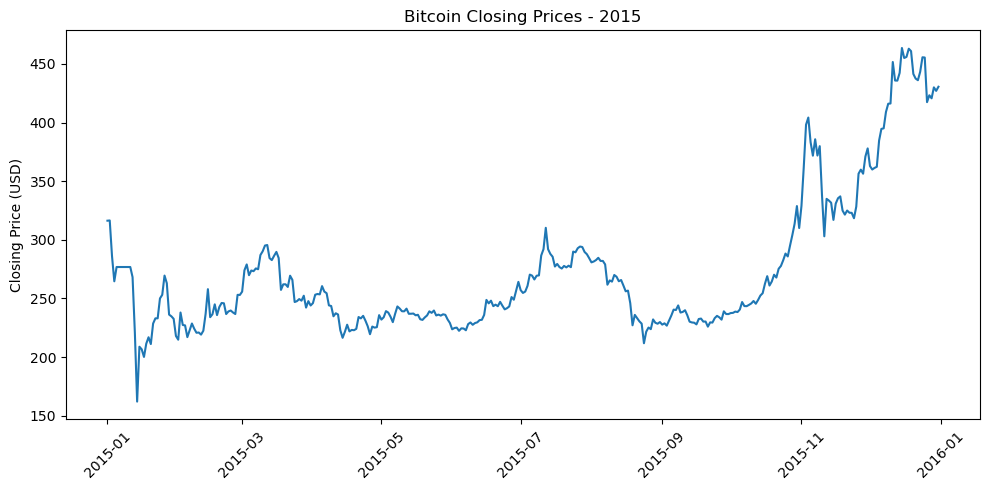

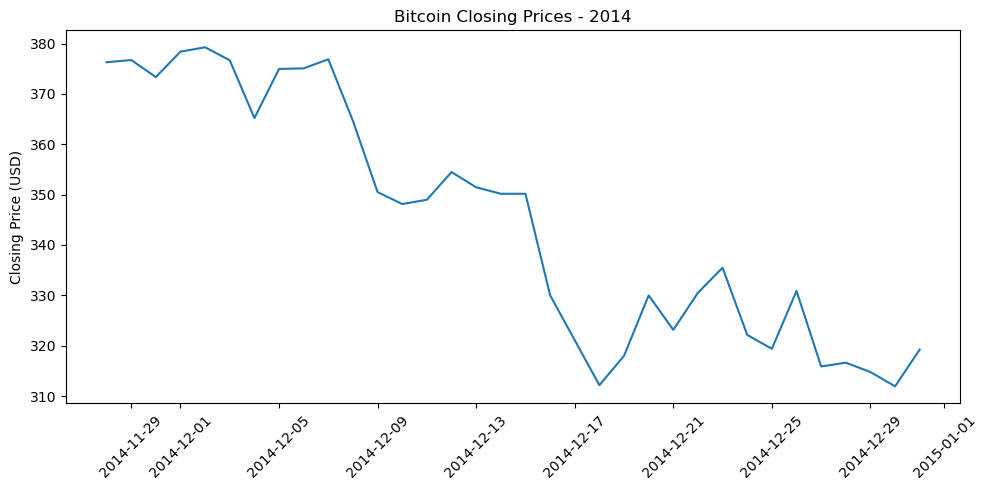

In [84]:
df['date'] = pd.to_datetime(df['date'])

date_range = str(df['date'].dt.date.min()) + ' to ' + str(df['date'].dt.date.max())

print(date_range)

df['year'] = df['date'].dt.year
df['month'] = df['date'].dt.month
df['day'] = df['date'].dt.day
unique_years = df['year'].unique()

for year in unique_years:
    year_data = df[df['year'] == year]

    year_month_day = year_data[['year', 'month', 'day']].copy()
    merged_data = pd.merge(year_month_day, df, on=['year', 'month', 'day'], how='left')

    plt.figure(figsize=(10, 5))
    plt.plot(merged_data['date'], merged_data['close'])
    plt.title(f'Bitcoin Closing Prices - {year}')
    plt.ylabel('Date')
    plt.ylabel('Closing Price (USD)')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

In [85]:
#D

In [86]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from mplfinance.original_flavor import candlestick_ohlc

import datetime

/tmp/ipykernel_17152/4037102349.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered['date'] = df_filtered['date'].map(mdates.date2num)


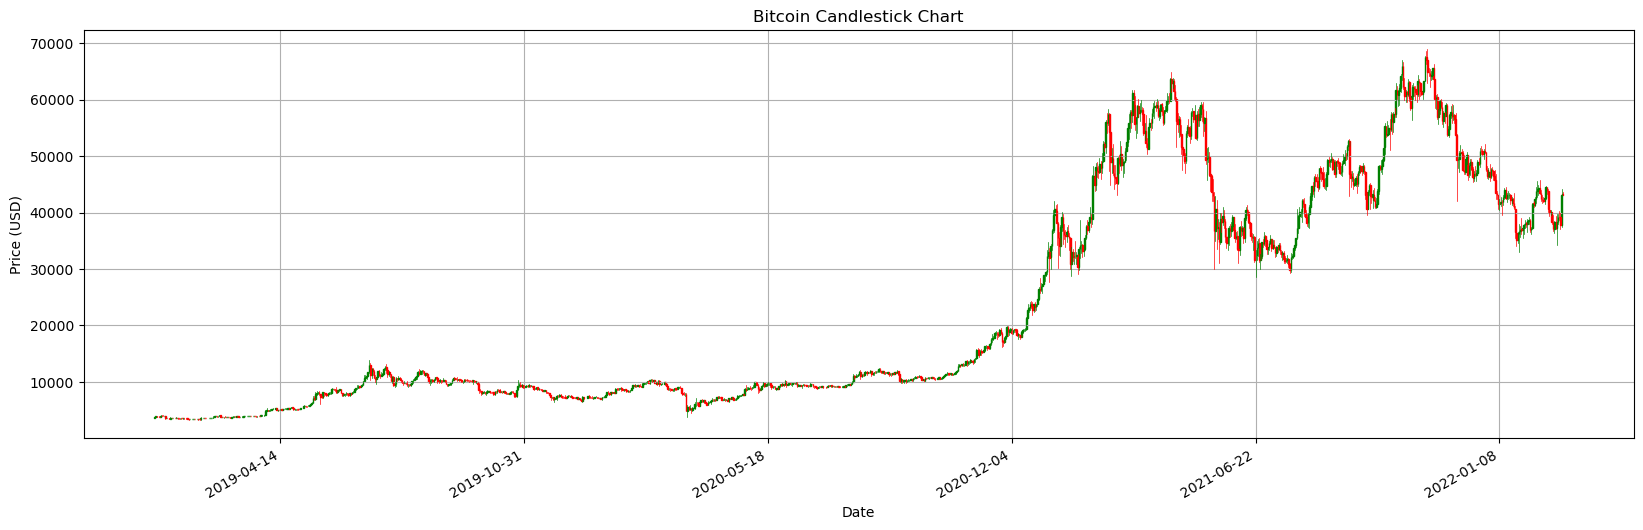

In [87]:
df_filtered = df[(df['date'] >= '2019-01-01') & (df['date'] <= '2022-12-31')]

df_filtered['date'] = df_filtered['date'].map(mdates.date2num)

fig, ax = plt.subplots(figsize=(20, 6))

candlestick_ohlc(ax, df_filtered[['date', 'open', 'high', 'low', 'close']].values, 
                 width=0.6, colorup='g', colordown='r')

ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
fig.autofmt_xdate()

plt.title('Bitcoin Candlestick Chart')
plt.xlabel('Date')
plt.ylabel('Price (USD)')
plt.grid(True)

plt.savefig('btc_candlestick.png')

plt.show()

In [122]:
def predict(X, w, b):
    return X.dot(w) + b #-> D

def gradient(y_hat, y, x):
    loss = y_hat - y
    dw = x.T.dot(loss) / len(y)
    db = np.sum(loss) / len(y)
    cost = np.sum(loss**2) / (2* len(y))
    return (dw, db, cost) #-> B)

def update_weight(w, b, lr, dw, db):
    w_new = w - lr * dw
    b_new = b - lr * db
    return (w_new, b_new) #-> D


In [156]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
scaler = StandardScaler()

X = df_filtered[['open', 'high', 'low', 'close']]
y = df_filtered['close']
y_mean = y.mean()
y_std = y.std()
y_scaled = (y - y_mean) / y_std

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_scaled, test_size=0.2, random_state=42, shuffle=True)


In [140]:
def linear_regression_vectorized(X, y, learning_rate=0.01, num_iterations=200):
    n_samples, n_features = X.shape
    w = np.zeros(n_features)
    b = 0
    losses = []

    for _ in range(num_iterations):
        y_hat = predict(X, w, b)
        dw, db, cost = gradient(y_hat, y, X)
        w, b = update_weight(w, b, learning_rate, dw, db)
        losses.append(cost) #-> C
    return w, b, losses


In [141]:
w , b , losses = linear_regression_vectorized ( X_train , y_train, learning_rate =0.01 , num_iterations =200)

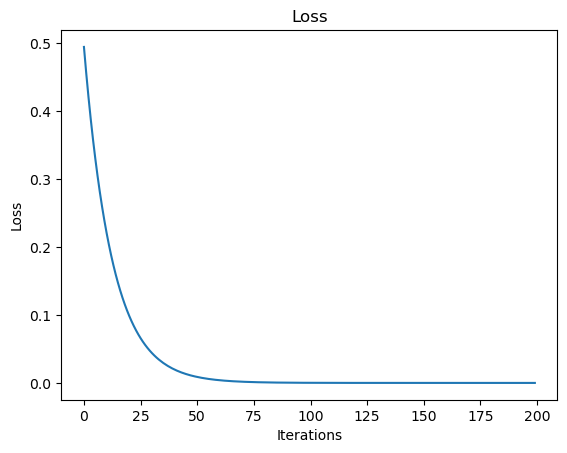

In [142]:
plt.plot(losses)
plt.xlabel('Iterations')
plt.ylabel('Loss')
plt.title('Loss')
plt.show()

In [157]:
from sklearn.metrics import r2_score

y_pred = predict(X_test, w, b)

rmse = np.sqrt(np.mean((y_pred - y_test)**2))

mae = np.mean(np.abs(y_pred - y_test))

mape = np.mean(np.abs((y_pred - y_test) / y_test)) * 100

y_train_pred = predict(X_train, w, b)
train_accuracy = r2_score(y_train, y_train_pred)

test_accuracy = r2_score(y_test, y_pred)

print(f'RMSE: {rmse:.4f}')
print(f'MAE: {mae:.4f}')
print(f'MAPE: {mape:.4f}')
print(f'Train Accuracy: {train_accuracy:.4f}') #-> A


RMSE: 0.0284
MAE: 0.0168
MAPE: 3.2204
Train Accuracy: 0.9991


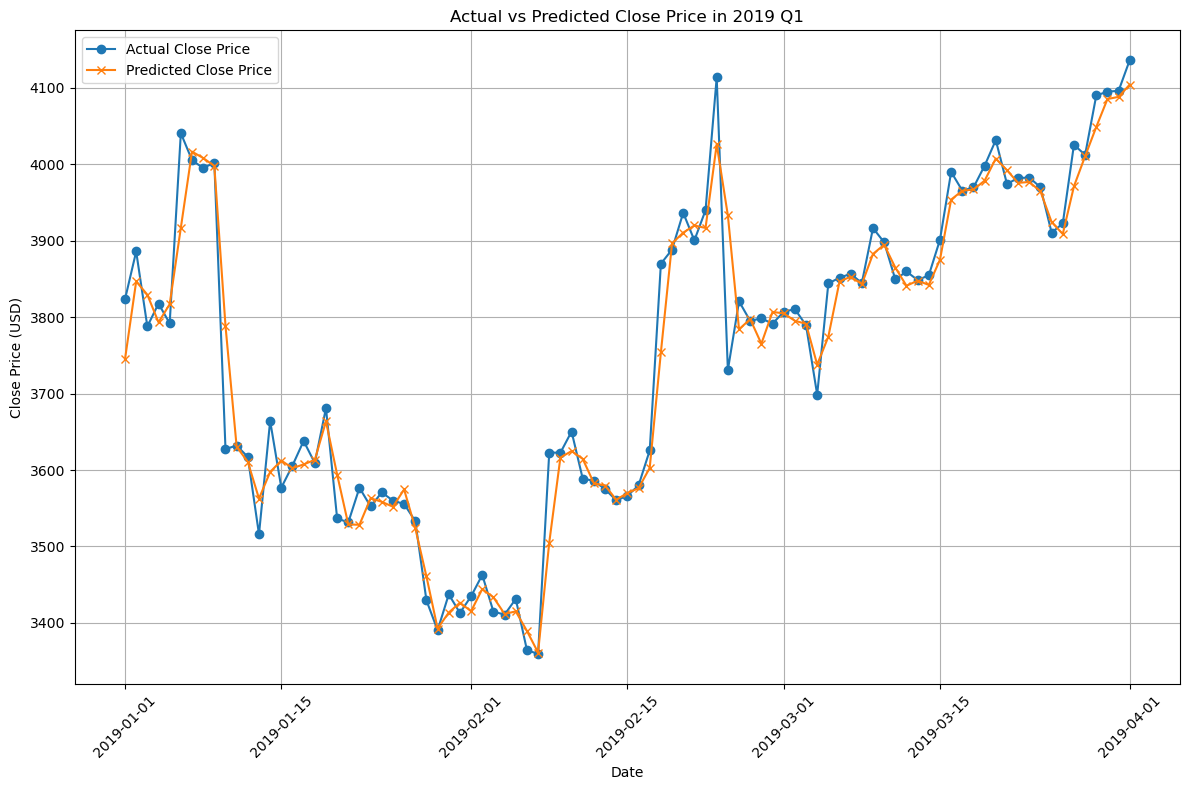

In [158]:
df_2019_q1 = df[(df['date'] >= '2019-01-01') & (df['date'] <= '2019-04-01')]

X_2019_q1 = df_2019_q1[['open', 'high', 'low', 'close']]
y_2019_q1_actual = df_2019_q1['close']

y_2019_q1_pred = predict(X_2019_q1, w, b)

plt.figure(figsize=(12, 8))
plt.plot ( df_2019_q1 ['date'] , y_2019_q1_actual , label ='Actual Close Price ', marker='o')
plt.plot(df_2019_q1 ['date'] , y_2019_q1_pred , label ='Predicted Close Price', marker ='x')
plt.title('Actual vs Predicted Close Price in 2019 Q1')
plt.xlabel('Date')
plt.ylabel('Close Price (USD)')
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()
